# Лабораторная работа №1

### Курносов Алексей

Данные : https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, normalize

import warnings

%matplotlib inline
rcParams['figure.figsize'] = (15.0, 8.0)

In [3]:
data = pd.read_csv("banknote.txt", delimiter=',', header=None)
data.columns = [u'variance', u'skewness', u'curtosis', u'entropy', u'class']

Эти данные представляют собой набор из 1372 обьектов, для определения фальшивости банкнот.

• 4 признака (тип - числовой):
    - энтропия изображения
    - коэффициент дисперсии
    - коэффициент ассиметрии
    - коэффициент эксцесса вейвлет-преобразования изображения
    
• Класс (всего 2 класса:фальшивые или настоящие)

In [4]:
data_train.head()


,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
print(data_train.shape)
print(data_train.columns)

(1372, 5)
Int64Index([0, 1, 2, 3, 4], dtype='int64')


In [6]:
data_train.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
data_train.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


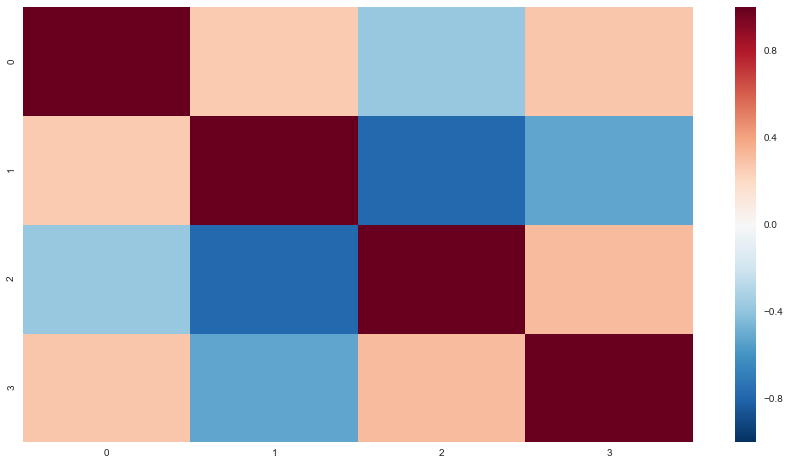

In [8]:
sns.heatmap(data_train.iloc[:,:-1].corr())

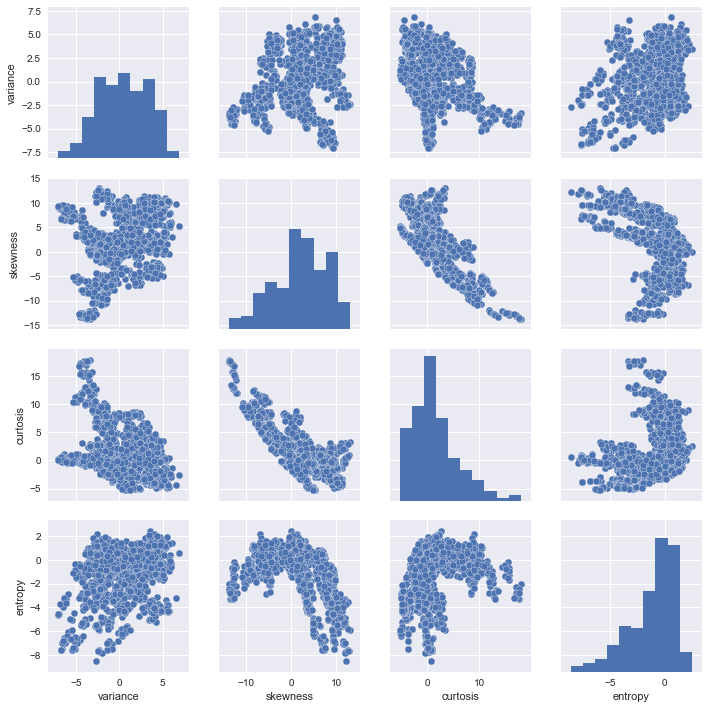

In [9]:
sns.pairplot(data.iloc[:,:-1])

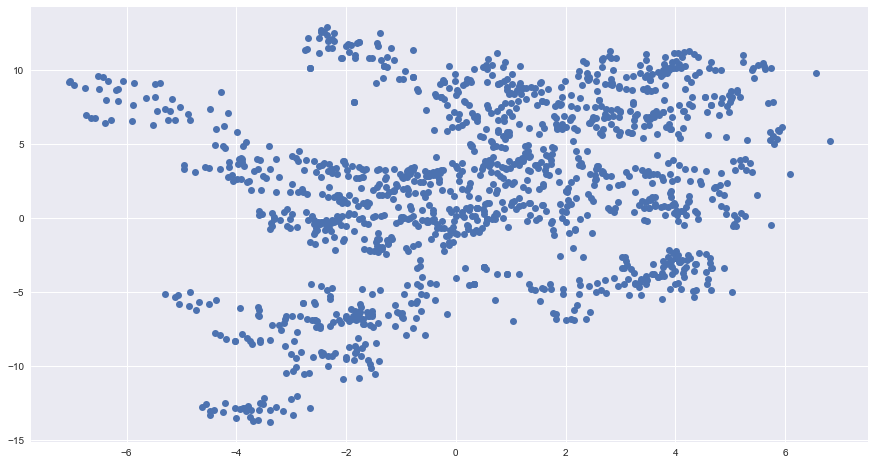

In [10]:
plt.plot(data['variance'], data['skewness'], 'o', alpha = 1)

variance skewness


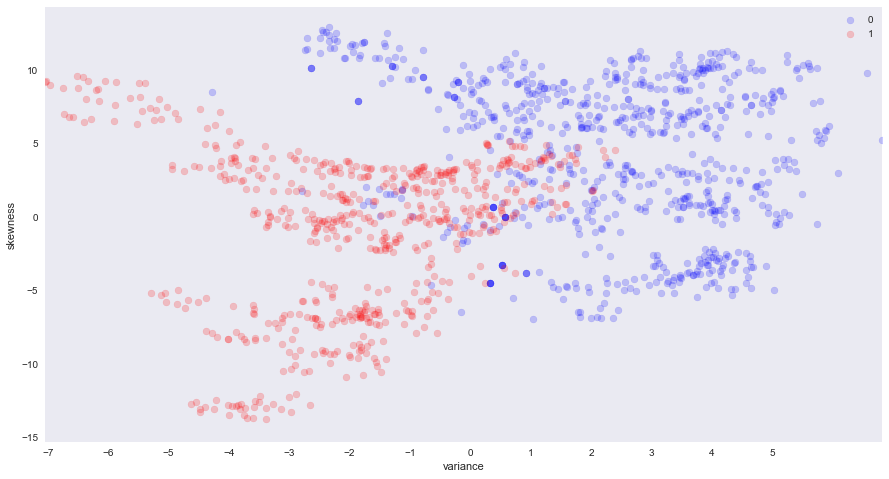

variance curtosis


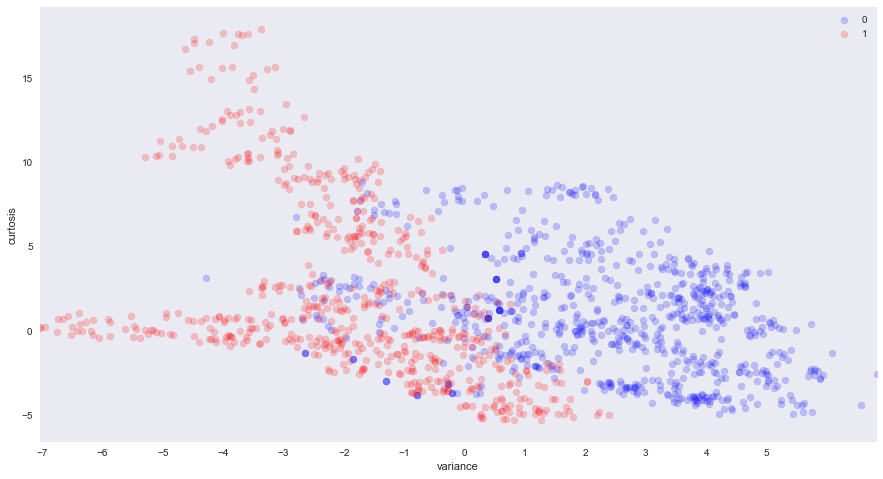

variance entropy


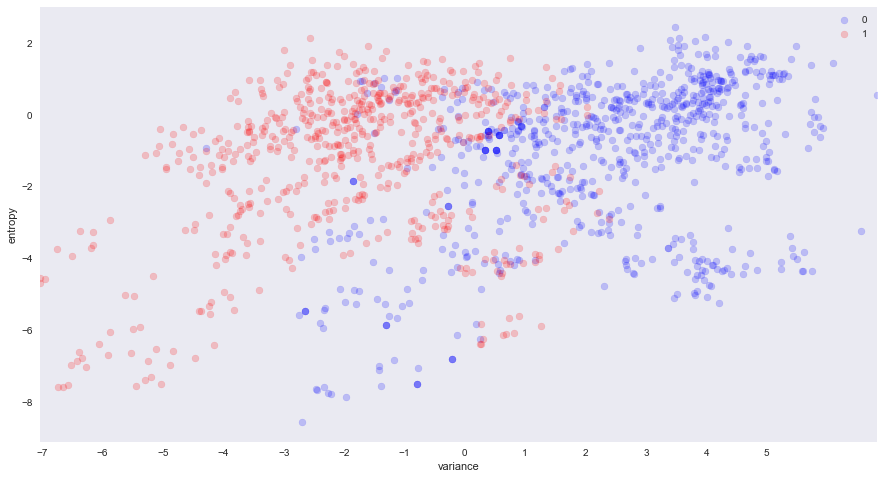

skewness curtosis


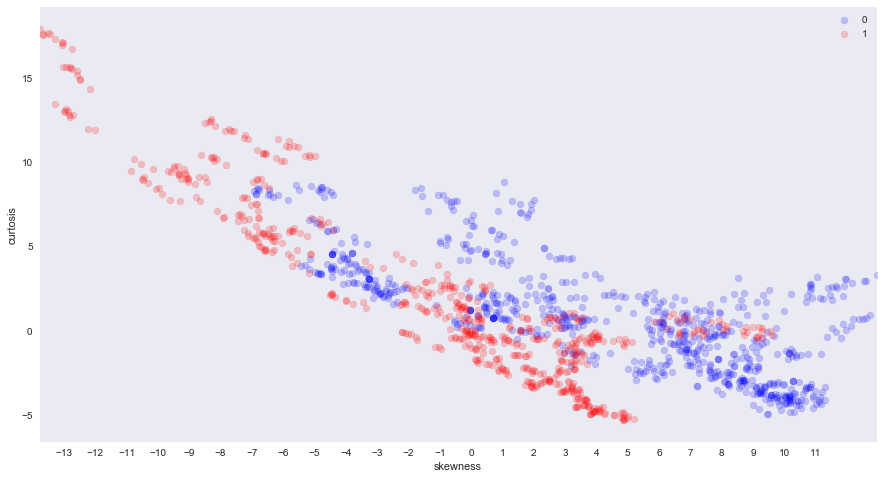

skewness entropy


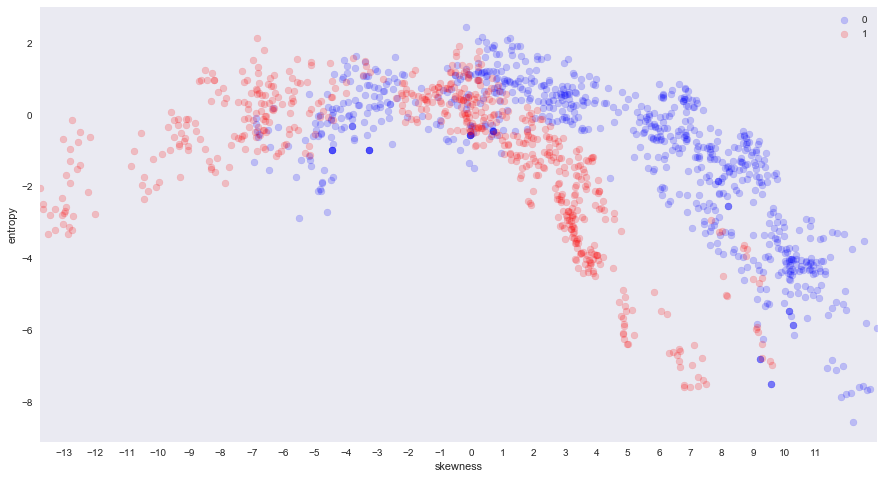

curtosis entropy


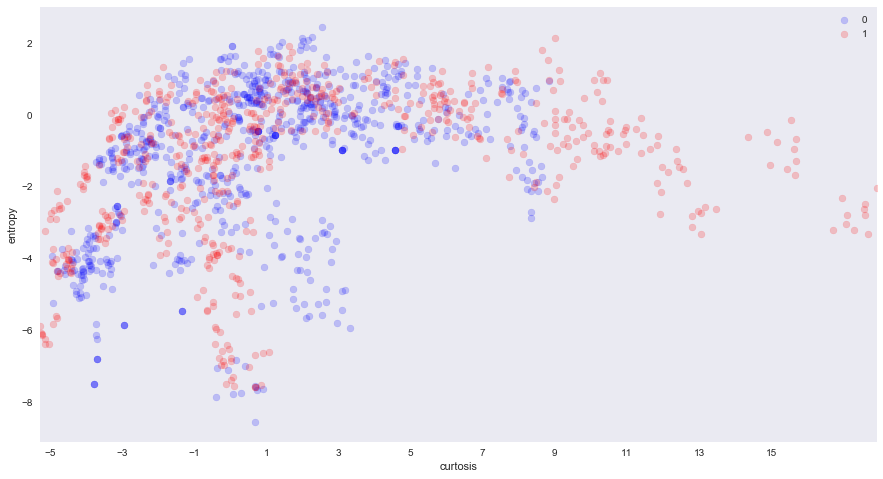

In [17]:
for i in range(0,len(data.columns)):
    for j in range(i+1,len(data.columns) -1 ):
        print(data.columns[i],data.columns[j])
        plt.scatter(data[data['class'] == 0][data.columns[i]],
            data[data['class'] == 0][data.columns[j]],
            alpha = 0.2,
            label = '0',
            color = 'b')

        plt.scatter(data[data['class'] == 1][data.columns[i]],
                    data[data['class'] == 1][data.columns[j]],
                    alpha = 0.2,
                    label = '1',
                    color = 'r')

        max_value = data[data.columns[i]].max()
        min_value = data[data.columns[i]].min()
        plt.xlabel(data.columns[i])
        plt.xticks(range(int(min_value),int(max_value),int(max_value/15) + 1))
        plt.xlim(min_value, max_value)
        plt.ylabel(data.columns[j])
        plt.legend()
        plt.grid()
        plt.show()

### Разделение на тренировочную и тестовую выборки

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)

### KNN

In [23]:
scores = []
err_train = []
err_test = []
k_neighbors = [1,2,3,4,5,10,15,30,50]
for k in k_neighbors:
    
    model = KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_pred,y_test))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))
    
    print('k = ' + str(k))
    print('Train error: ' + str(err_train[-1]))
    print('Test error: ' + str(err_test[-1]))
    print('Accuracy score: ' + str(scores[-1]))
    print()

k = 1
Train error: 0.0
Test error: 0.0
Accuracy score: 1.0

k = 2
Train error: 0.0
Test error: 0.0
Accuracy score: 1.0

k = 3
Train error: 0.00104166666667
Test error: 0.0
Accuracy score: 1.0

k = 4
Train error: 0.0
Test error: 0.0
Accuracy score: 1.0

k = 5
Train error: 0.0
Test error: 0.0
Accuracy score: 1.0

k = 10
Train error: 0.0
Test error: 0.0
Accuracy score: 1.0

k = 15
Train error: 0.00520833333333
Test error: 0.0
Accuracy score: 1.0

k = 30
Train error: 0.00729166666667
Test error: 0.00728155339806
Accuracy score: 0.992718446602

k = 50
Train error: 0.015625
Test error: 0.0218446601942
Accuracy score: 0.978155339806



### Общий график ошибок от числа соседей


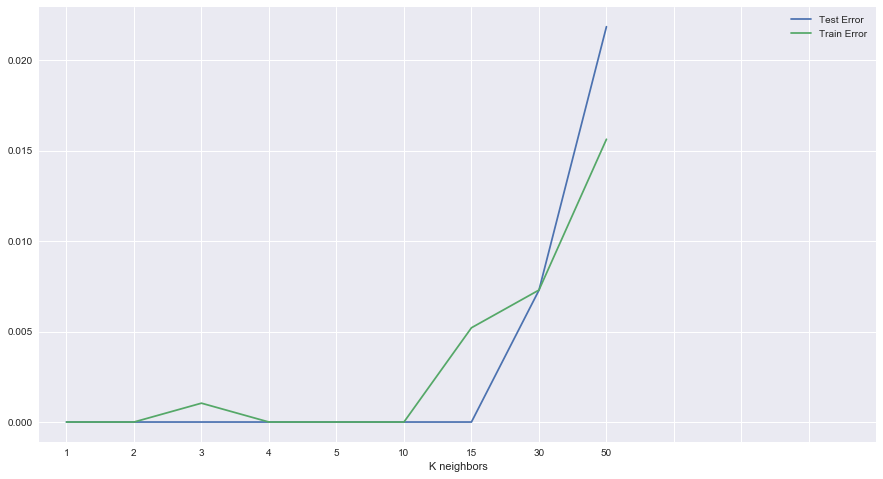

In [32]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.legend()

## Нейронные сети

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings

%matplotlib inline
rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
data = pd.read_csv("banknote.txt", delimiter=',', header=None)
data.columns = [u'variance', u'skewness', u'curtosis', u'entropy', u'class']

### Разделение на тренировочную и тестовую выборки

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)

### Подбор гиперпараметров
Подберем оптимальное значение параметра регуляризации alpha при помощи sklearn.model_selection.GridSearchCV

In [5]:
model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)

grid = {'alpha': np.power(10.0, np.arange(-7, 4))}
gs = GridSearchCV(model, grid, scoring = 'accuracy', cv = 5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=15, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [6]:
test_err = [1 - i for i in gs.cv_results_['mean_test_score']]
train_err = [1 - i for i in gs.cv_results_['mean_train_score']]

### График ошибок на тренировочной и тестовой выборке от L2 

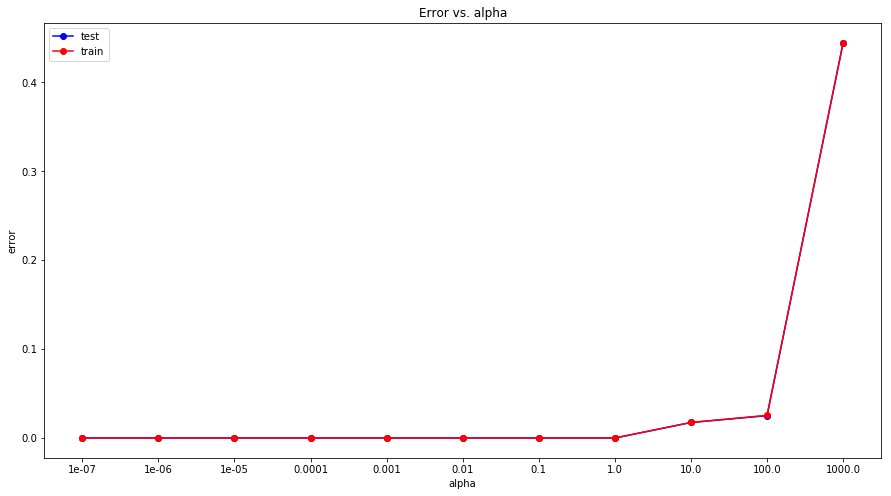

In [7]:
plt.plot(train_err, 'b-o', label = 'test')
plt.plot(test_err, 'r-o', label = 'train')
plt.xticks(range(11),np.power(10.0, np.arange(-7, 4)))
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [8]:
print("Лучший результат при",gs.best_params_)

Лучший результат при {'alpha': 9.9999999999999995e-08}


Видим, что наименьшая ошибка достигается при alpha=1.0, кроме того при параметре регуляризации ниже 1.0 результат меняется незначительно. ** Поэтому, для того, чтобы задача стала более интересной, уменьшим количество нейронов в скрытом слое до 1.**

In [9]:
model = MLPClassifier(hidden_layer_sizes = (1,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)

grid = {'alpha': np.power(10.0, np.arange(-7, 4))}
gs = GridSearchCV(model, grid, scoring = 'accuracy', cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=15, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [10]:
test_err = [1 - i for i in gs.cv_results_['mean_test_score']]
train_err = [1 - i for i in gs.cv_results_['mean_train_score']]

### График ошибок на тренировочной и тестовой выборке от L2 

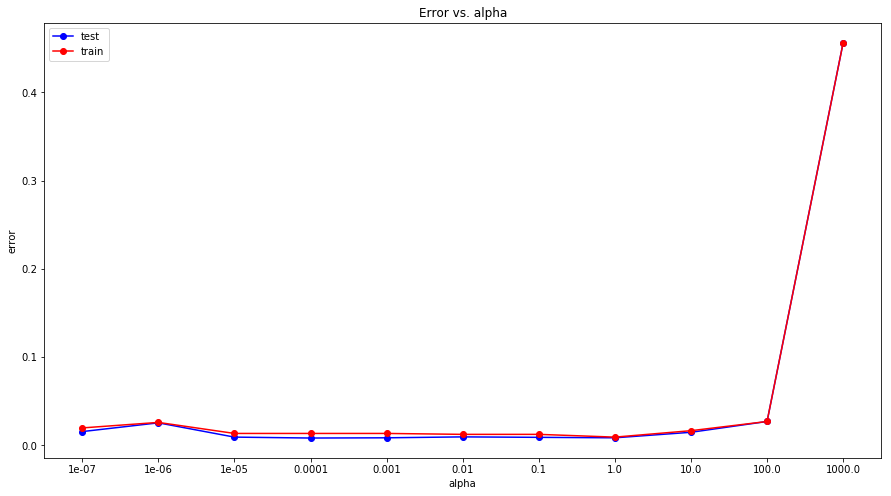

In [11]:
plt.plot(train_err, 'b-o', label = 'test')
plt.plot(test_err, 'r-o', label = 'train')
plt.xticks(range(11),np.power(10.0, np.arange(-7, 4)))
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [12]:
print("Лучший результат при",gs.best_params_)

Лучший результат при {'alpha': 1.0}


По-прежнему, наилучшим параметром является alpha=1.0

### Классификатор при найденном оптимальном значении alpha:

In [13]:
model = MLPClassifier(alpha = 1.0, hidden_layer_sizes = (1,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)
model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=15, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.009375
0.00970873786408


### Presicion, recall, f1-score

In [15]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       240
          1       0.98      1.00      0.99       172

avg / total       0.99      0.99      0.99       412



Видно, что очень хорошо справляется с задачей классификации.